Perform the following operations using Python by creating student performance dataset.

    1 Display Missing Values
    2 Replace missing values using any 2 suitable methods
    3 Identify outliers using boxplot and scatterplot
    4 Handle outlier using any technique
    5 Perform any 2 data normalization technique

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('academicperformance.csv')
df.head()

,Roll,Name,Femarks,SEMarks,Temarks,Bemarks
0,1,Aage Raksha Gajanan,8.40,8.60,9.80,9.90
1,2,Ahire Anuja Sanjay,8.14,8.14,9.32,9.82
2,3,Ajare Ashiya Nasaruddin,6.61,6.61,9.14,9.14
3,4,Amrutkar Roshani Suresh,7.20,7.30,8.90,NaN
4,5,Attarde Komal Bhagwan,7.05,7.45,9.05,9.40


In [17]:
df.info()
df.describe()
df.shape
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Roll     60 non-null     int64  
 1   Name     60 non-null     object 
 2   Femarks  58 non-null     float64
 3   SEMarks  57 non-null     float64
 4   Temarks  59 non-null     float64
 5   Bemarks  58 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 2.9+ KB


Index(['Roll', 'Name', 'Femarks', 'SEMarks', 'Temarks', 'Bemarks'], dtype='object')

## Display Missing Values

In [21]:
df.isnull().sum()
fe=pd.isnull(df['Femarks'])
df[fe]

,Roll,Name,Femarks,SEMarks,Temarks,Bemarks
5,6,Avhad Pushkaraj Laxmikant,NaN,8.0,7.91,7.84
39,40,Mahale Shreya Sanjay,NaN,0.0,9.86,9.91


In [22]:
se = pd.isnull(df['SEMarks'])
df[se]

,Roll,Name,Femarks,SEMarks,Temarks,Bemarks
15,16,Chavhan Divya Bhikan,8.04,NaN,9.59,9.66
45,46,Patel Jaid Aslam,0.00,NaN,8.50,9.14
58,59,Ratnaparkhi Raj Ashok,8.59,NaN,9.63,9.56


In [23]:
te = pd.isnull(df['Temarks'])
df[te]

,Roll,Name,Femarks,SEMarks,Temarks,Bemarks
18,19,Deore Atharva Mohan,6.25,6.89,NaN,7.2


In [24]:
be = pd.isnull(df['Bemarks'])
df[be]

,Roll,Name,Femarks,SEMarks,Temarks,Bemarks
3,4,Amrutkar Roshani Suresh,7.2,7.3,8.9,NaN
52,53,Patole Tanisha Prakash,4.0,8.0,9.0,NaN


##2 Replace missing values using any 2 suitable methods


In [26]:
miss=[0]
data=pd.read_csv('academicperformance.csv',na_values=miss)
#pandas will consider 0 as a missing value (NaN) when reading the CSV file.
data.tail()

,Roll,Name,Femarks,SEMarks,Temarks,Bemarks
55,56,Pawar Manish Sahebrao,8.55,8.64,9.73,9.80
56,57,Phadol Purva Gorakh,7.27,7.83,9.55,9.13
57,58,Rabade Vishal Chandrasing,9.54,10.00,9.45,9.54
58,59,Ratnaparkhi Raj Ashok,8.59,NaN,9.63,9.56
59,60,Ravte Rohit Ukhardya,NaN,NaN,5.00,9.36


##Replacing with single constant value

In [27]:
singleval = df.fillna(0)
singleval.tail()

,Roll,Name,Femarks,SEMarks,Temarks,Bemarks
55,56,Pawar Manish Sahebrao,8.55,8.64,9.73,9.80
56,57,Phadol Purva Gorakh,7.27,7.83,9.55,9.13
57,58,Rabade Vishal Chandrasing,9.54,10.00,9.45,9.54
58,59,Ratnaparkhi Raj Ashok,8.59,0.00,9.63,9.56
59,60,Ravte Rohit Ukhardya,0.00,0.00,5.00,9.36


##Replacing with mean, median, std, max

In [45]:
# replace by mean
mean_data = data
mean_data['Femarks'] = mean_data['Femarks'].fillna(mean_data['Femarks'].mean())
mean_data.tail()

# replace by median
med_data = data
med_data['SEMarks'] = med_data['SEMarks'].fillna(med_data['SEMarks'].median())
med_data.tail()

# replace by standard deviation
std_data = data
std_data['SEMarks'] = std_data['SEMarks'].fillna(std_data['SEMarks'].std())
std_data.tail()

#replace by max
max_data = mean_data
max_data['SEMarks'] = max_data['SEMarks'].fillna(max_data['SEMarks'].max())
max_data.tail()

,Roll,Name,Femarks,SEMarks,Temarks,Bemarks
55,56,Pawar Manish Sahebrao,8.550000,8.64,9.73,9.80
56,57,Phadol Purva Gorakh,7.270000,7.83,9.55,9.13
57,58,Rabade Vishal Chandrasing,9.540000,10.00,9.45,9.54
58,59,Ratnaparkhi Raj Ashok,8.590000,8.64,9.63,9.56
59,60,Ravte Rohit Ukhardya,9.679074,8.64,5.00,9.36


## Identify outliers using boxplot

In [38]:
data.columns

Index(['Roll', 'Name', 'Femarks', 'SEMarks', 'Temarks', 'Bemarks'], dtype='object')

<Axes: >

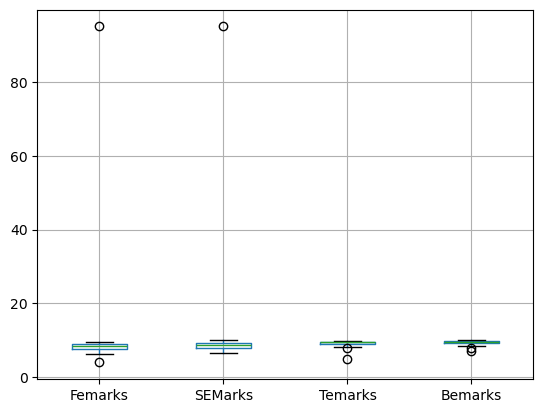

In [39]:
cols = ['Femarks', 'SEMarks', 'Temarks', 'Bemarks']
data.boxplot(cols)

Detecting outliers using IQR

In [50]:
fe_q1 = mean_data['Femarks'].quantile(0.25)
fe_q3 = mean_data['Femarks'].quantile(0.75)
fe_iqr = fe_q3 - fe_q1
fe_lowbound = fe_q1 - 1.5 * fe_iqr
fe_highbound = fe_q3 + 1.5 * fe_iqr
print(f"low bound {fe_lowbound}  high bound {fe_highbound}")
fe_data = mean_data['Femarks']
fe_outliers = []
for i in fe_data: 
    if i < fe_lowbound or i > fe_highbound:
        fe_outliers.append(i)

print(f"FE outliers {fe_outliers} ")

trimmed_fe = mean_data[(mean_data['Femarks'] >= fe_lowbound) & (mean_data['Femarks'] <= fe_highbound)]
print("Original dataset size:", mean_data.shape)
print("Trimmed dataset size:", trimmed_fe.shape)
data.columns

# another tefchnickl

# refined_df['Temarks']=np.where(refined_df['Temarks']<lwrbound,mediana,refined_df['Temarks'])

low bound 5.316250000000001  high bound 11.186249999999998
FE outliers [95.0, 4.0] 
Original dataset size: (60, 6)
Trimmed dataset size: (58, 6)


Index(['Roll', 'Name', 'Femarks', 'SEMarks', 'Temarks', 'Bemarks'], dtype='object')

5 Perform any 2 data normalization technique

In [54]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Assuming your data is stored in a DataFrame called df

# Separate the numerical columns for normalization
numerical_columns = ['Femarks', 'SEMarks', 'Temarks', 'Bemarks']

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
df_min_max_scaled = data.copy()  # Make a copy of the original DataFrame
df_min_max_scaled[numerical_columns] = min_max_scaler.fit_transform(data[numerical_columns])
# df_min_max_scaled.head()

# scales all the values between 0 to 1 to extract features from it

#Z score normalization (standard scaling)
standard_scaler = StandardScaler()
df_standard_scaled = data.copy()  # Make a copy of the original DataFrame
df_standard_scaled[numerical_columns] = standard_scaler.fit_transform(data[numerical_columns])

# Print the first few rows of the normalized DataFrames
print("Min-Max Scaled DataFrame:")
print(df_min_max_scaled.head())

print("\nStandardized DataFrame:")
print(df_standard_scaled.head())


Min-Max Scaled DataFrame:
   Roll                     Name   Femarks   SEMarks   Temarks   Bemarks
0     1      Aage Raksha Gajanan  0.048352  0.022735  0.977597  0.964286
1     2       Ahire Anuja Sanjay  0.045495  0.017532  0.879837  0.935714
2     3  Ajare Ashiya Nasaruddin  0.028681  0.000226  0.843177  0.692857
3     4  Amrutkar Roshani Suresh  0.035165  0.008031  0.794297       NaN
4     5    Attarde Komal Bhagwan  0.033516  0.009727  0.824847  0.785714

Standardized DataFrame:
   Roll                     Name   Femarks   SEMarks   Temarks   Bemarks
0     1      Aage Raksha Gajanan -0.114628 -0.115849  0.727803  0.984616
1     2       Ahire Anuja Sanjay -0.137928 -0.157251  0.045984  0.823975
2     3  Ajare Ashiya Nasaruddin -0.275044 -0.294956 -0.209698 -0.541469
3     4  Amrutkar Roshani Suresh -0.222169 -0.232854 -0.550607       NaN
4     5    Attarde Komal Bhagwan -0.235612 -0.219353 -0.337539 -0.019388
